# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [161]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    precision_recall_curve,
    roc_auc_score,
    roc_curve,
    make_scorer,)


# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

## Loading the dataset

In [162]:
data = pd.read_csv("ExtraaLearn.csv")

## Data Overview

- Observations
- Sanity checks

***Checking the first 5 and last 5 rows of the dataset***

In [163]:
data.head() #First 5 rows

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [164]:
data.tail() #Last 5 rows

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


***The Shape of the Data***

In [165]:
data.shape #Code to help understand the shape of the data - Number of rows and columns

(4612, 15)

- The dataset has 4612 rows and 15 columns.

***Check the data types of the columns for the dataset***

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

- We note that none of the columns have any missing values.
- There are three data types in the dataset which include: Object(10), Int(4), Float(1).

***Checking the number of unique values in each column***

In [167]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

- We note that the ID column is unique for each customer and will not add value to the model therefore we can drop the column
- Most of the variables are categorical except ID, Age, Website_visits, Time_spent_on_website, and page_views_per_visit.

***Dropping the unique values column***

In [168]:
# Dropping the ID column
data.drop(columns='ID',inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

***Checking for any missing values in the data and fixing them using appropriate methods if any***

In [169]:
data.isnull().sum()

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

There are no missing values in this dataset.

***Checking the statistical summary of the data***

In [170]:
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857
std,13.16145,2.82913,743.82868,1.96812,0.45768
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000


- The mean age of the leads is about 46 years old.(Working class)
- The maximum pages to be veiwed per visit are about 18 pages but the averages pages viewed per visit is 3 pages which is significantly less.
- 

***Checking the count of each unique category in each of the categorical variables.***

In [171]:
# Making a list of all catrgorical variables 
cat_col=['current_occupation', 'first_interaction', 'profile_completed', 'last_activity',
        'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)

Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------------------------------------
No     4085
Yes     527
Name: digital_media, dtype: int64
--------------------------------------------------
No     3907
Yes     705
Name: educational_channels, dtype: int64
--------------------------

- gggg

In [172]:
df = data.copy()

**UNIVARIATE ANALYSIS**

First we will define a hist_box() function that will provide both a boxplot and a histogram in the same visual, with which we can perform univariate analysis on the columns of this dataset.

In [173]:
# Defining the hist_box() function
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.25, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

***Plotting the histogram and box plot for the variable Age***

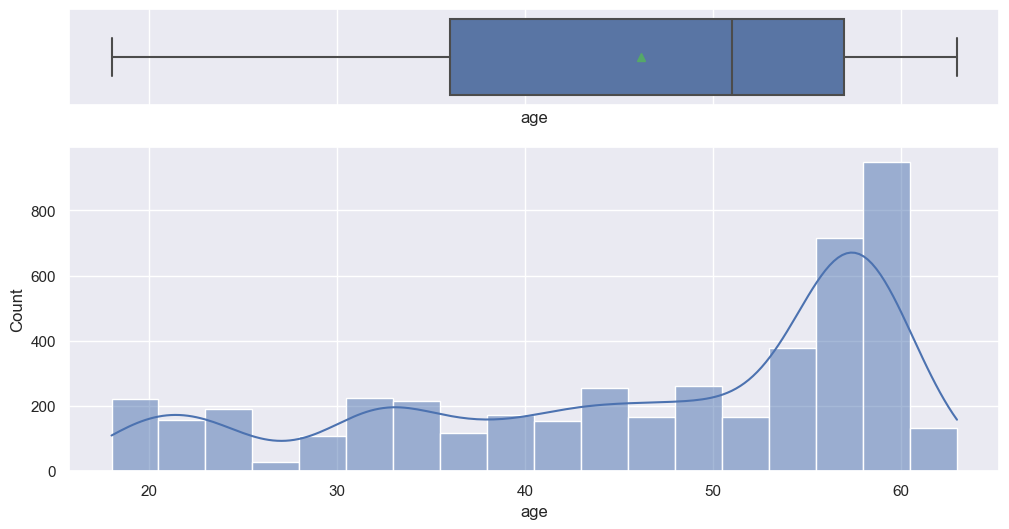

In [174]:
hist_box(df, "age")

- The median age is around the 50s.
- The interquartile range (IQR) spans from approximately 40 to 60 years.
- There are no obvious outliers
- The age distribution is right-skewed with a peak around the early 60s.
- There's a dip in the 30s, indicating fewer individuals in this age group.

***Plotting the histogram and box plot for the variable Website_visits***

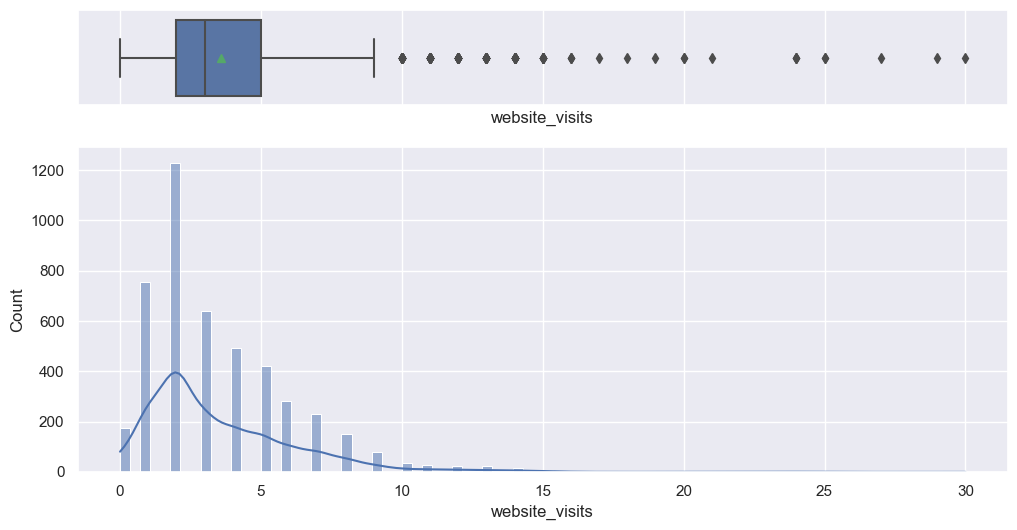

In [175]:
hist_box(df, 'website_visits')

- The median number of website visits is around 3.
- The interquartile range (IQR) spans from approximately 1 to 5 website visits.
- The distribution of website visits is right-skewed, with a majority of data points concentrated towards the lower end (0-5 visits).
- The most frequent count is around 1 visit.
- There is a sharp decline in frequency as the number of visits increases, with very few data points beyond 10 visits.

In [176]:
# To check how many leads have not visited web-site
df[df["website_visits"] == 0].shape

(174, 14)

- There are 174 leads who have not visited the website, and the dataset has 15 columns of data for each lead.

***Plotting the histogram and box plot for the variable Time_spent_on_website***

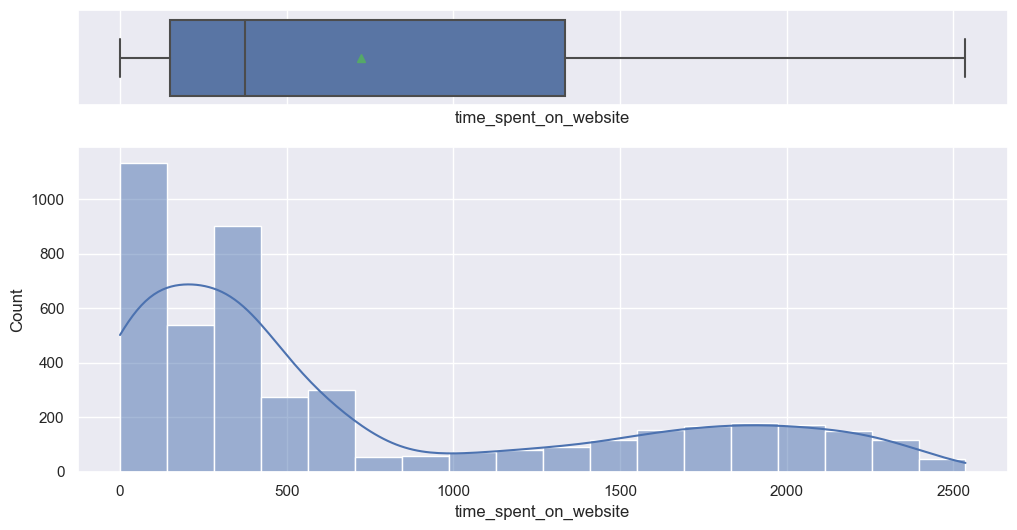

In [177]:
hist_box(df, 'time_spent_on_website')

The distribution of website visits is right-skewed

***Plotting the histogram and box plot for the variable page_views_per_visit***

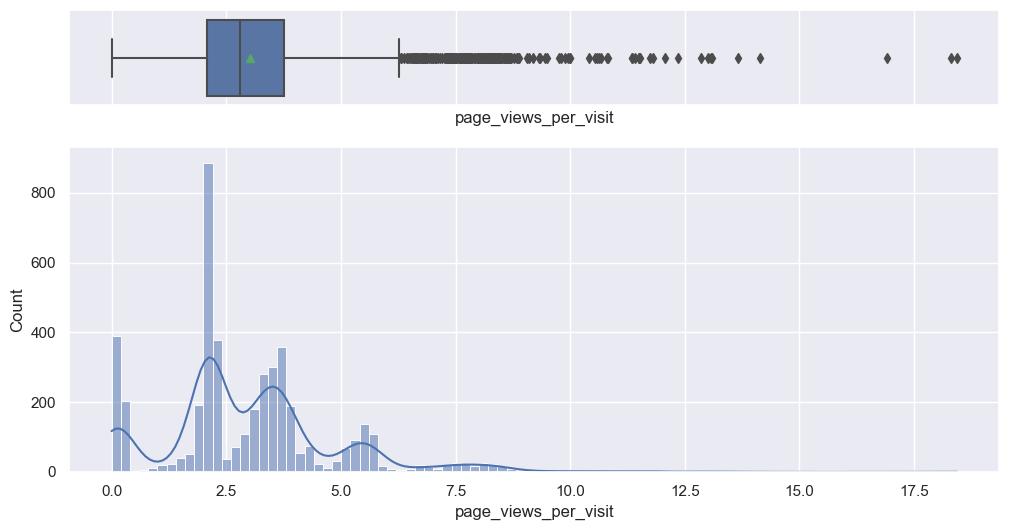

In [178]:
hist_box(df, 'page_views_per_visit')

**Distribution of the categorical variables**

***Current_ocupation***

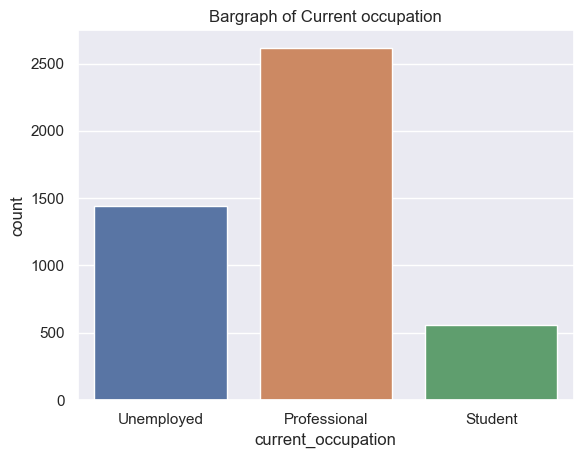

In [179]:
sns.countplot(x = df["current_occupation"]) #Countplot for the current occupation
plt.title("Bargraph of Current occupation")
plt.show()

In [180]:
df['current_occupation'].value_counts(normalize=True)

Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: current_occupation, dtype: float64

***First Interaction***

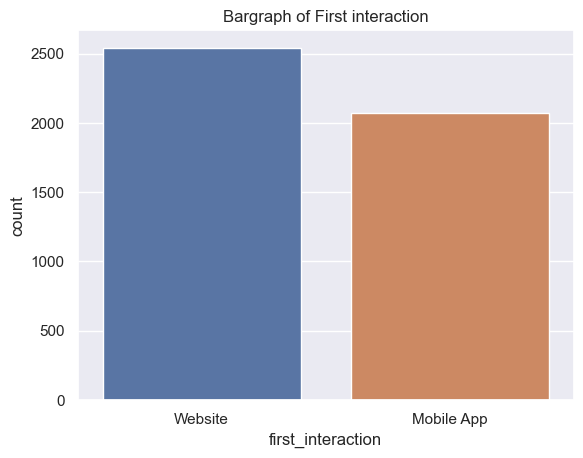

In [181]:
sns.countplot(x = df["first_interaction"]) #Countplot for the first_interaction
plt.title("Bargraph of First interaction")
plt.show()

In [182]:
df['first_interaction'].value_counts(normalize=True)

Website      0.55117
Mobile App   0.44883
Name: first_interaction, dtype: float64

***Profile completed***

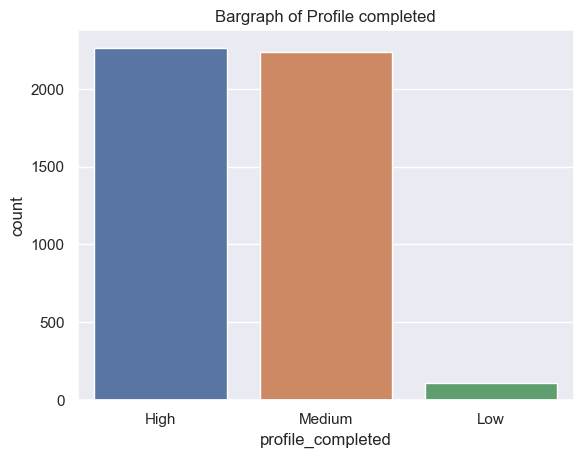

In [183]:
sns.countplot(x = df["profile_completed"]) #Countplot for the profile_completed
plt.title("Bargraph of Profile completed")
plt.show()

In [184]:
df['profile_completed'].value_counts(normalize=True)

High     0.49089
Medium   0.48591
Low      0.02320
Name: profile_completed, dtype: float64

***Last activity***

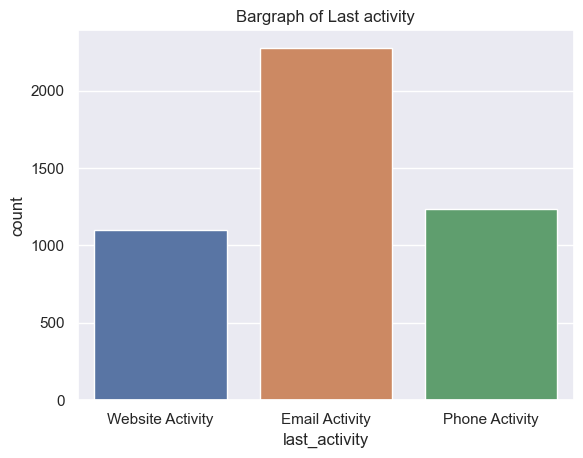

In [185]:
sns.countplot(x = df["last_activity"]) #Countplot for the last_activity
plt.title("Bargraph of Last activity")
plt.show()

In [186]:
df['last_activity'].value_counts(normalize=True)

Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: last_activity, dtype: float64

***Print media type 1***

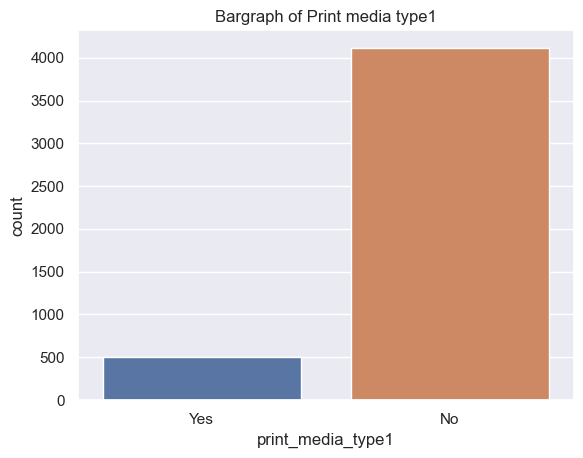

In [187]:
sns.countplot(x = df["print_media_type1"]) #Countplot for the print_media_type1
plt.title("Bargraph of Print media type1")
plt.show()

In [188]:
df['print_media_type1'].value_counts(normalize=True)

No    0.89224
Yes   0.10776
Name: print_media_type1, dtype: float64

***Print media type 2***

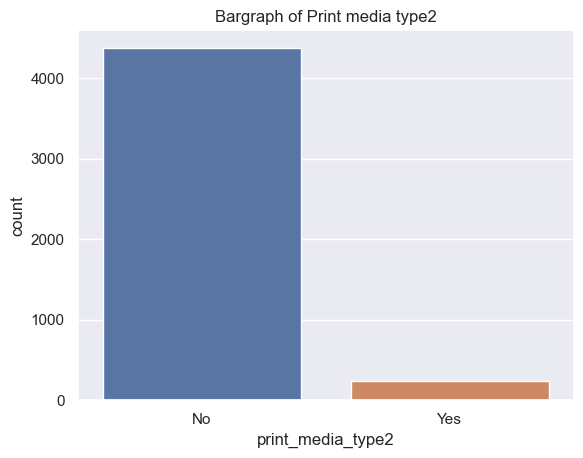

In [189]:
sns.countplot(x = df["print_media_type2"]) #Countplot for the print_media_type2
plt.title("Bargraph of Print media type2")
plt.show()

In [190]:
df['print_media_type2'].value_counts(normalize=True)

No    0.94948
Yes   0.05052
Name: print_media_type2, dtype: float64

***Digital media***

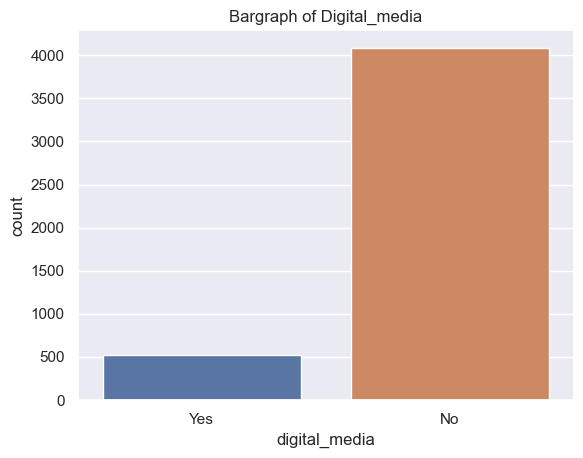

In [191]:
sns.countplot(x = df["digital_media"]) #Countplot for the digital media column
plt.title("Bargraph of Digital_media")
plt.show()

In [192]:
df['digital_media'].value_counts(normalize=True)

No    0.88573
Yes   0.11427
Name: digital_media, dtype: float64

***Educational channels***

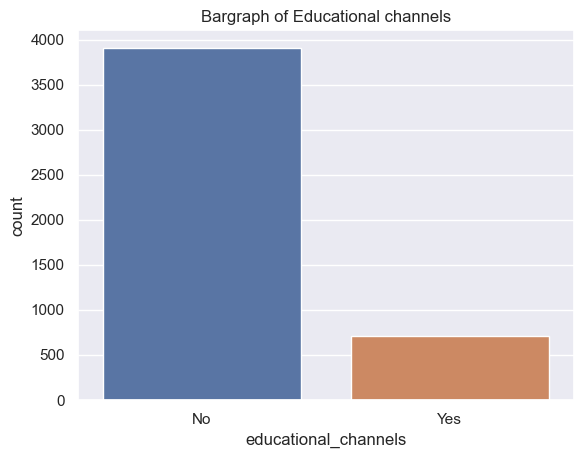

In [193]:
sns.countplot(x = df["educational_channels"]) #Countplot for the educational channels
plt.title("Bargraph of Educational channels")
plt.show()

In [194]:
df['educational_channels'].value_counts(normalize=True)

No    0.84714
Yes   0.15286
Name: educational_channels, dtype: float64

***Referral***

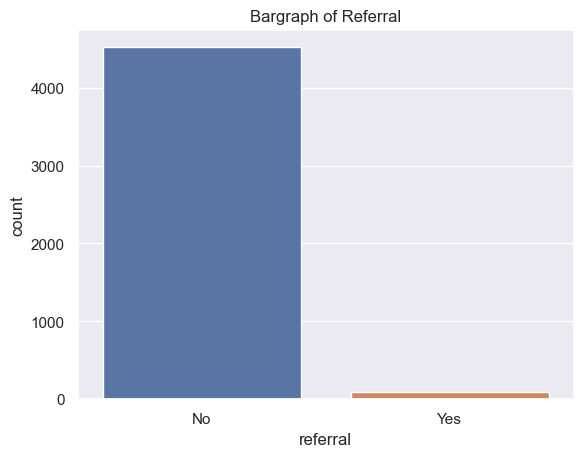

In [195]:
sns.countplot(x = df["referral"]) #Countplot for the referral column
plt.title("Bargraph of Referral")
plt.show()

In [196]:
df['referral'].value_counts(normalize=True)

No    0.97984
Yes   0.02016
Name: referral, dtype: float64

***Status***

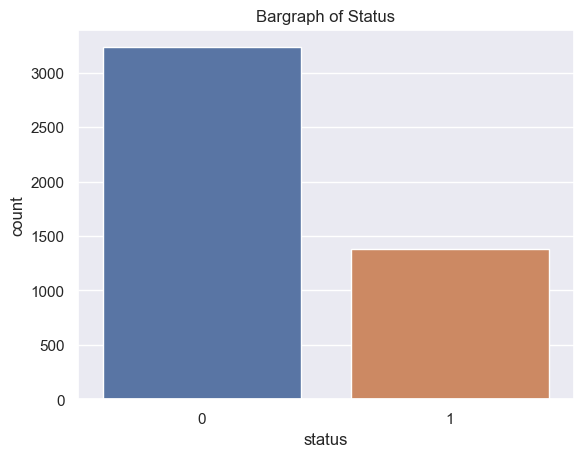

In [197]:
sns.countplot(x = df["status"]) #Countplot for the status of the leads
plt.title("Bargraph of Status")
plt.show()

In [198]:
df['status'].value_counts(normalize=True)

0   0.70143
1   0.29857
Name: status, dtype: float64

**BIVARIATE ANALYSIS**

***Visualizing the correlation matrix using a heatmap***

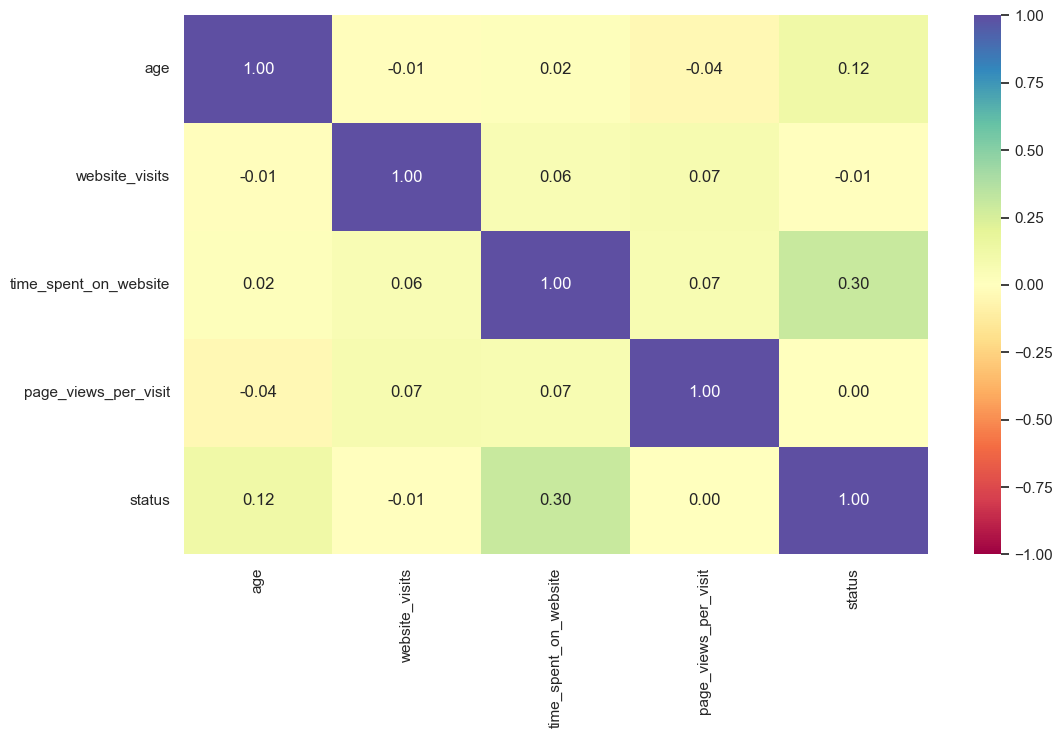

In [199]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

We will define a stacked barplot() function to help analyse how the target variable varies across predictor categories.

In [200]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(12,10)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True,)
  plt.legend(loc="lower right")
  plt.ylabel(target)

status                 0    1
current_occupation           
Professional        1687  929
Student              490   65
Unemployed          1058  383


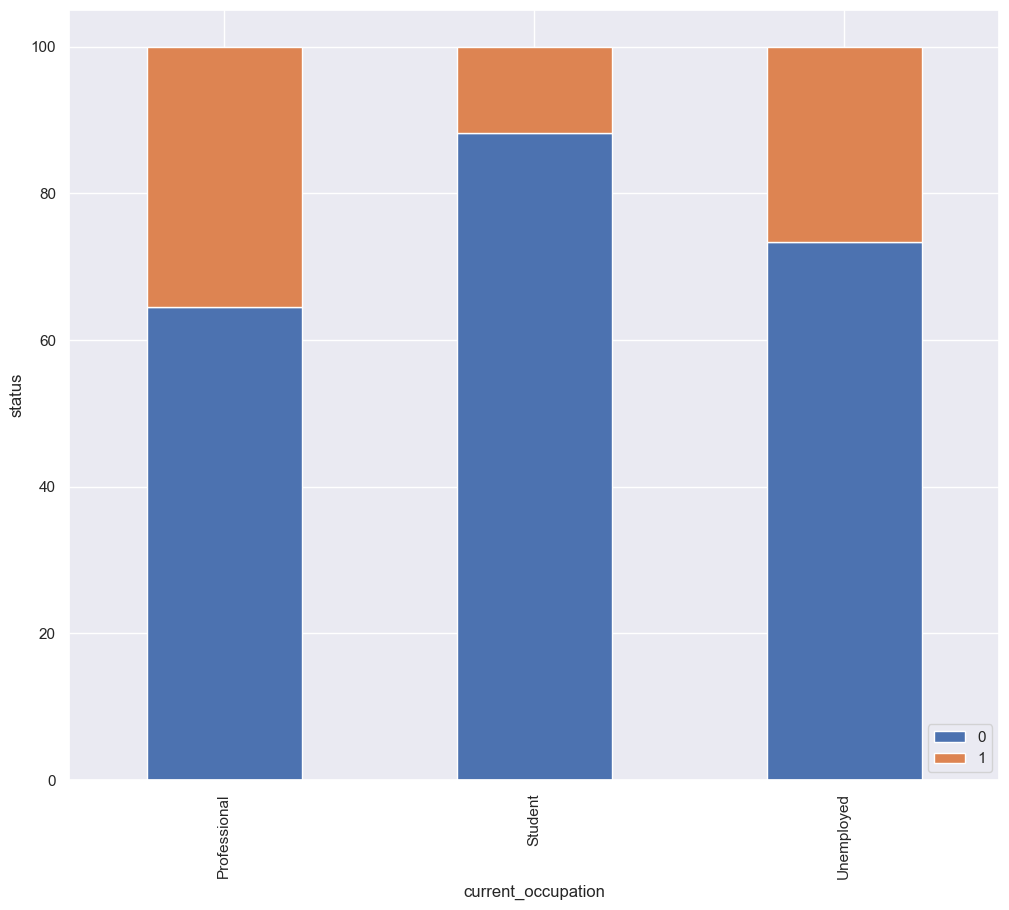

In [201]:
stacked_barplot(data, "current_occupation", "status")

grouped = df.groupby(['current_occupation', 'status']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='current_occupation', columns='status', values='count')

print(pivot_table)

***Using age to differentiate between the leads***

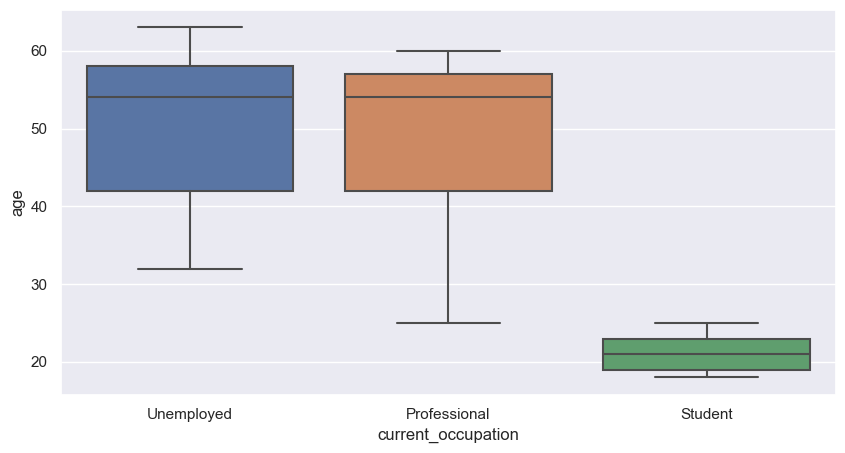

In [202]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = df["current_occupation"], y = df["age"])
plt.show()

Unemployed and professional users are primarily middle-aged 30-60 years with a median around 50 years, while students are younger 20-30 years with a median around 22 years.

In [203]:
df.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


status                0     1
first_interaction            
Mobile App         1852   218
Website            1383  1159


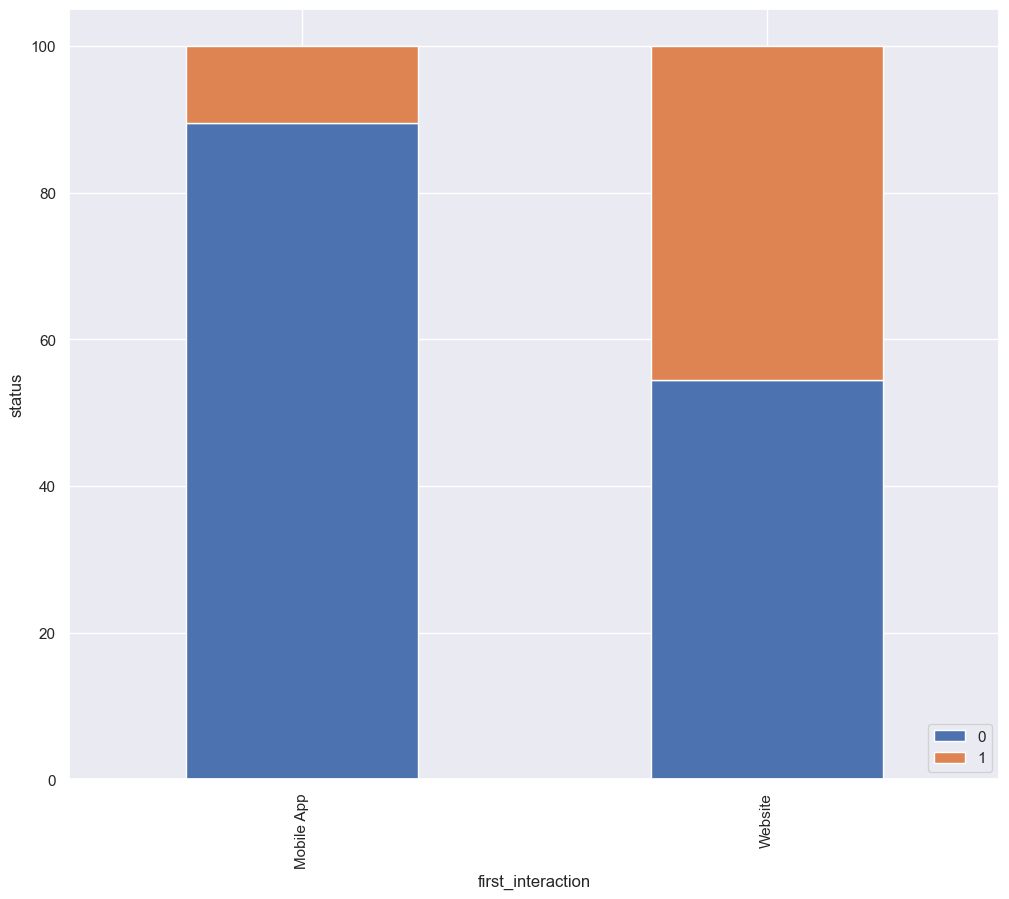

In [204]:
stacked_barplot(data, "first_interaction", "status")

grouped = df.groupby(['first_interaction', 'status']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='first_interaction', columns='status', values='count')

print(pivot_table)

status                0    1
profile_completed           
High               1318  946
Low                  99    8
Medium             1818  423


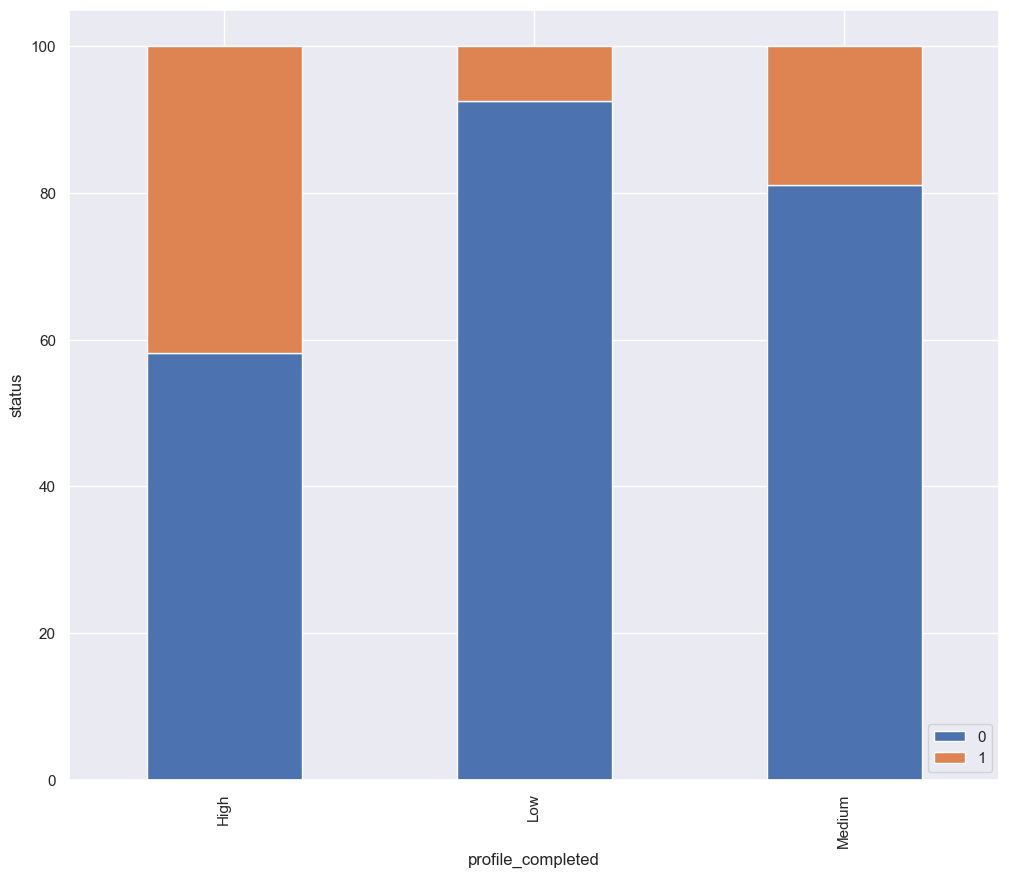

In [205]:
stacked_barplot(data, "profile_completed", "status")

grouped = df.groupby(['profile_completed', 'status']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='profile_completed', columns='status', values='count')

print(pivot_table)

status                0     1
print_media_type1            
No                 2897  1218
Yes                 338   159


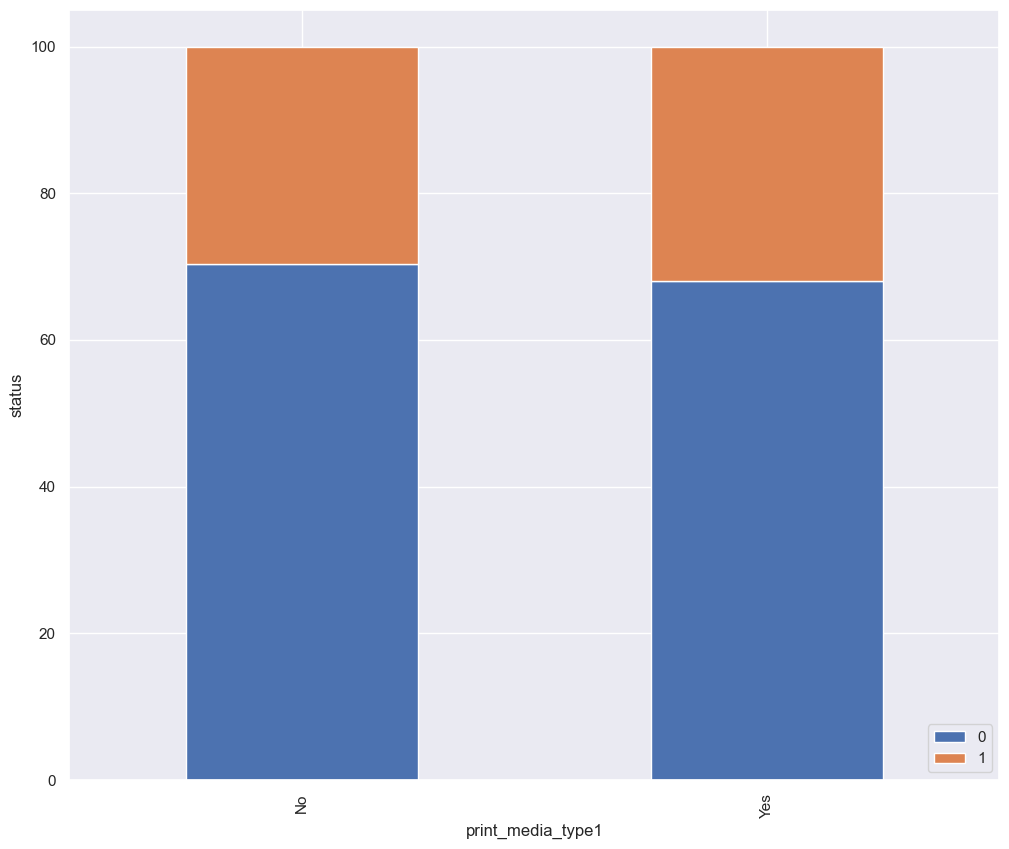

In [206]:
stacked_barplot(data, "print_media_type1", "status")

grouped = df.groupby(['print_media_type1', 'status']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='print_media_type1', columns='status', values='count')

print(pivot_table)

status                0     1
print_media_type2            
No                 3077  1302
Yes                 158    75


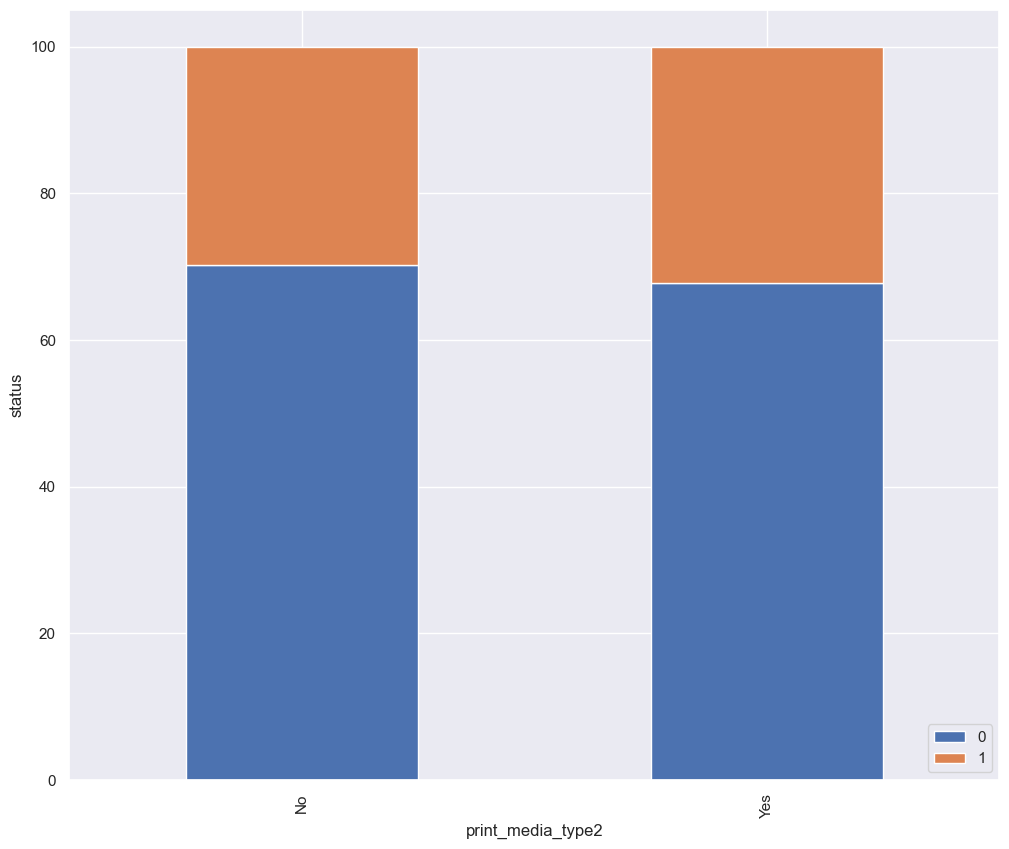

In [207]:
stacked_barplot(data, "print_media_type2", "status")

grouped = df.groupby(['print_media_type2', 'status']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='print_media_type2', columns='status', values='count')

print(pivot_table)

status            0     1
digital_media            
No             2876  1209
Yes             359   168


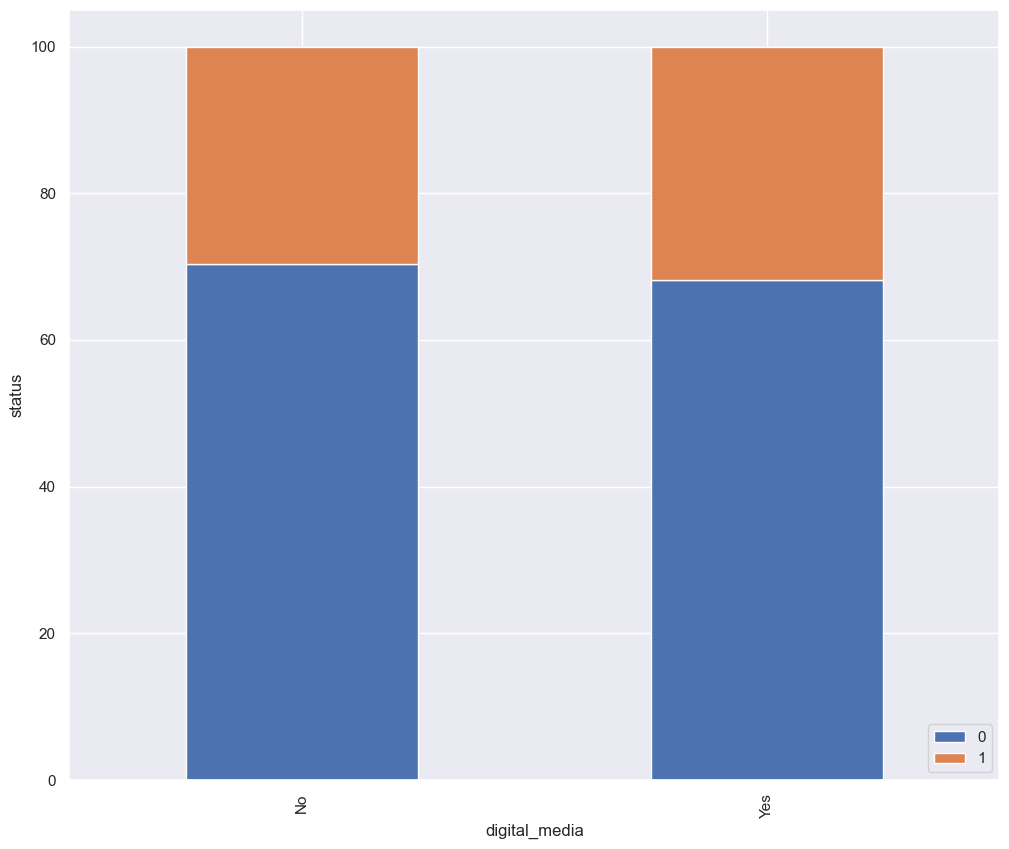

In [208]:
stacked_barplot(data, "digital_media", "status")

grouped = df.groupby(['digital_media', 'status']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='digital_media', columns='status', values='count')

print(pivot_table)

status               0    1
last_activity              
Email Activity    1587  691
Phone Activity     971  263
Website Activity   677  423


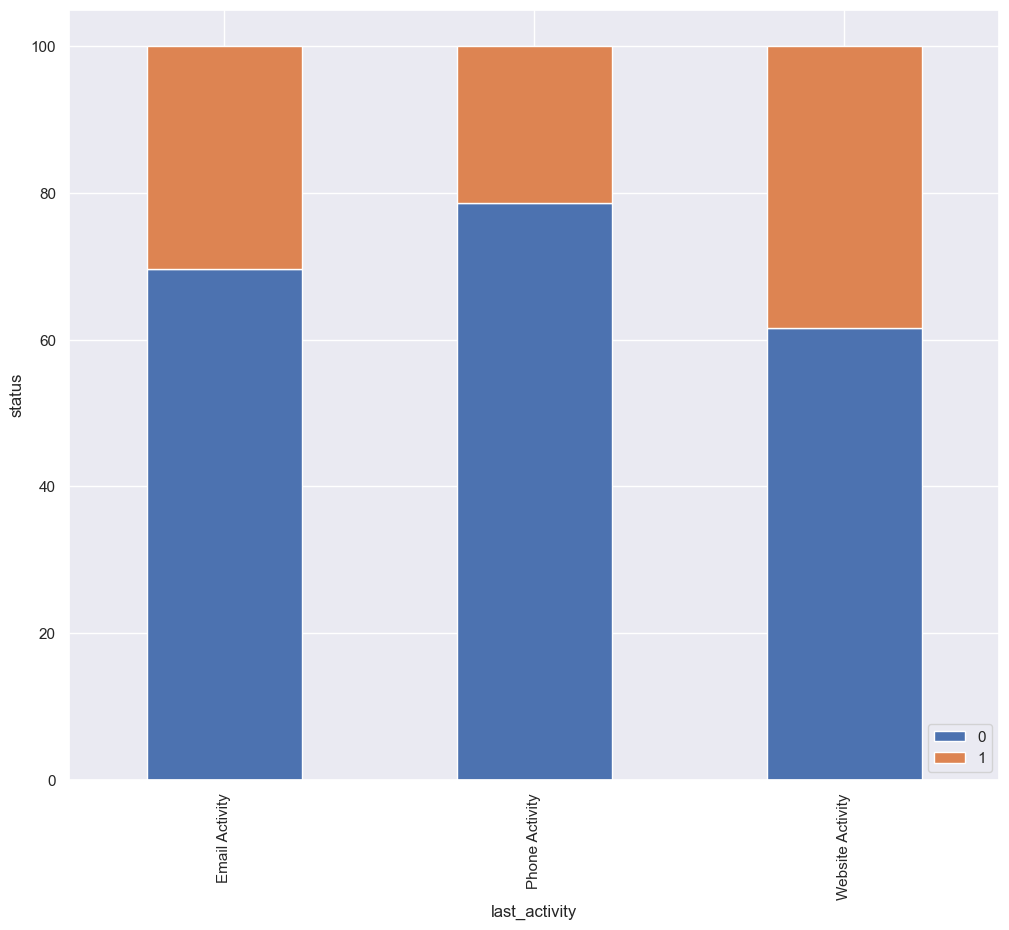

In [209]:
stacked_barplot(data, "last_activity", "status")

grouped = df.groupby(['last_activity', 'status']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='last_activity', columns='status', values='count')

print(pivot_table)

status                   0     1
educational_channels            
No                    2727  1180
Yes                    508   197


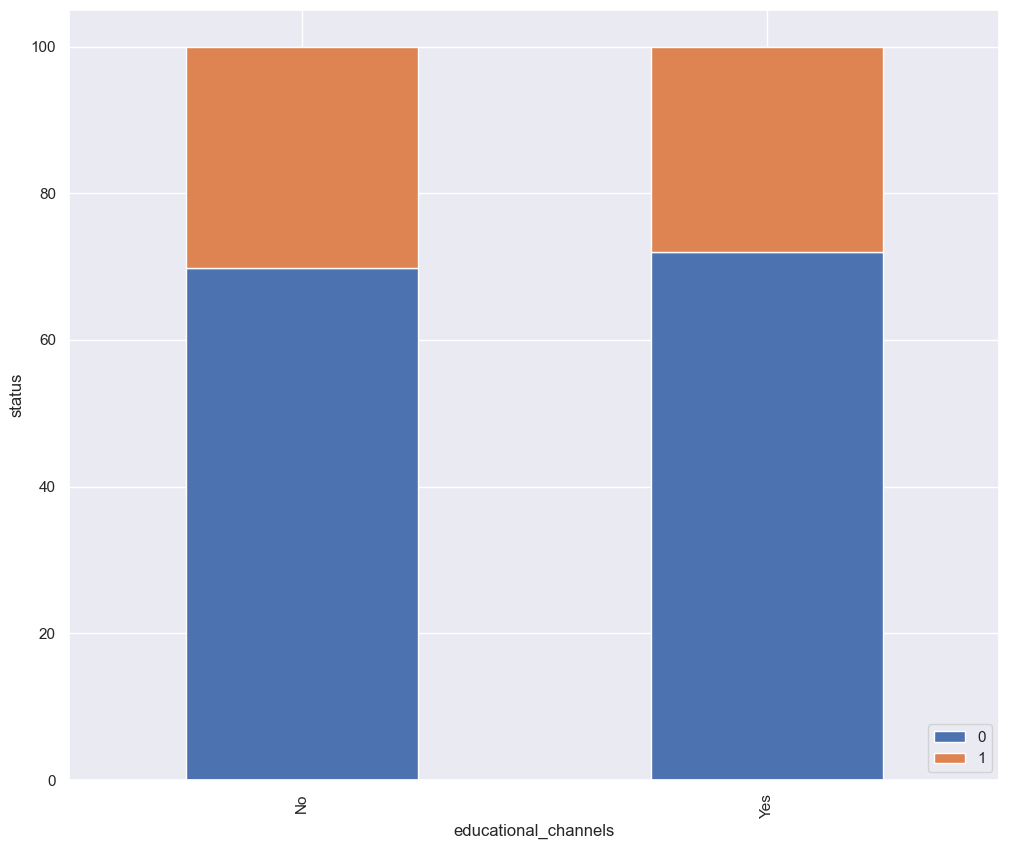

In [210]:
stacked_barplot(data, "educational_channels", "status")

grouped = df.groupby(['educational_channels', 'status']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='educational_channels', columns='status', values='count')

print(pivot_table)

status       0     1
referral            
No        3205  1314
Yes         30    63


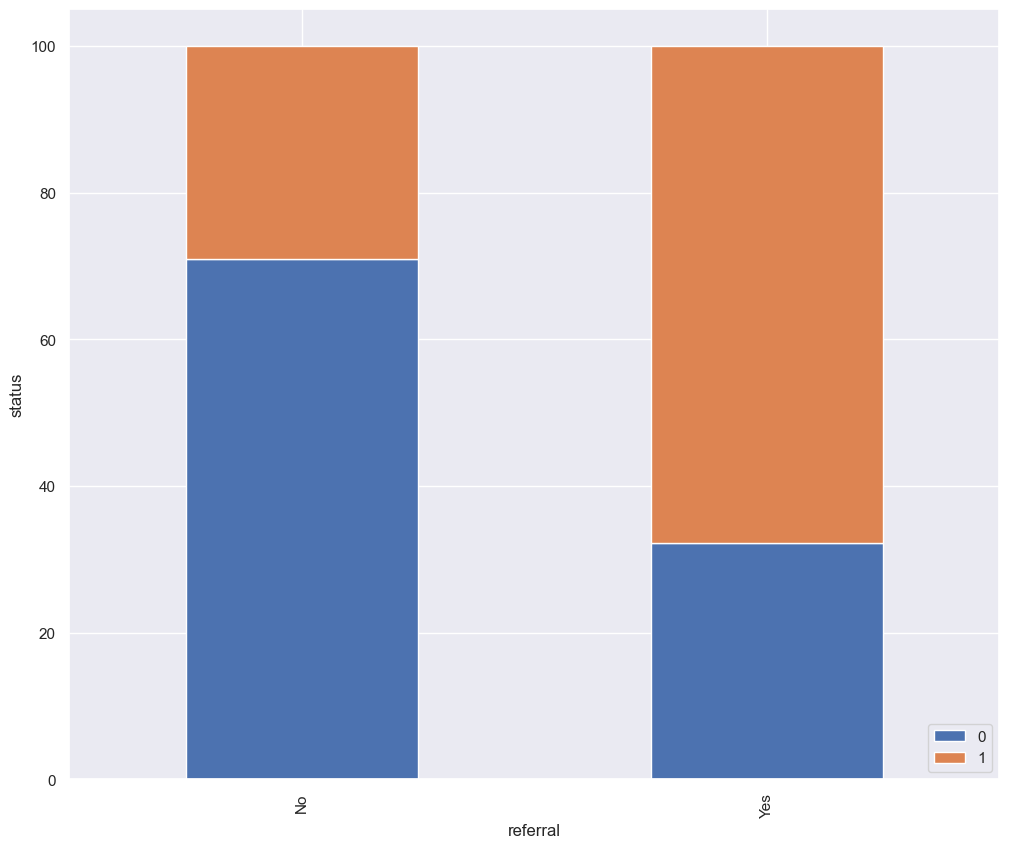

In [211]:
stacked_barplot(data, "referral", "status")

grouped = df.groupby(['referral', 'status']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='referral', columns='status', values='count')

print(pivot_table)

**OUTLIER CHECK**

- We check for any ouliers in the dataset

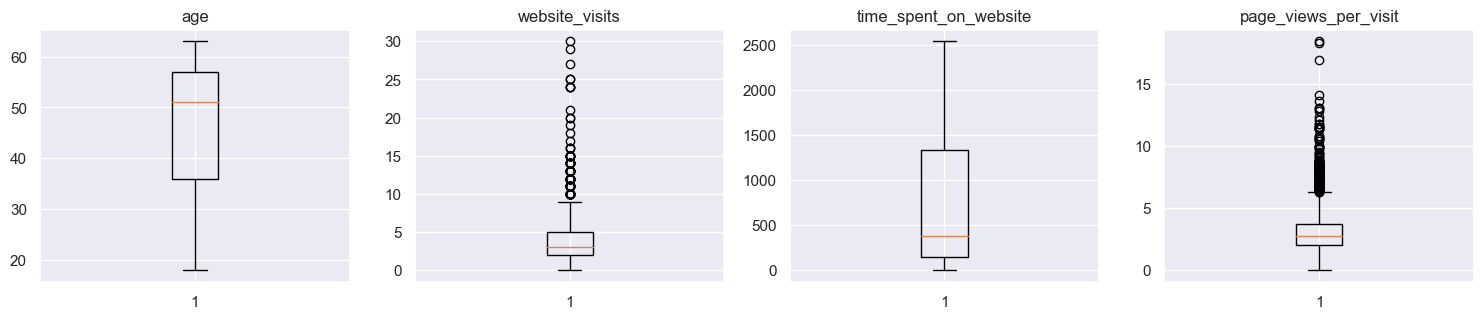

In [212]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Most users visit the website fewer than 10 times (median: ~4), spend a median of ~600 minutes, and view about 2 pages per visit. There are several outliers with significantly higher engagement.

### Data preparation for modelling

- Define the Feature Set and Target Variable. Assuming status is the target variable
- Convert Categorical Variables to Dummy Variables
- Split the Data into Training and Testing Sets
- Check the Shapes of the Resulting Datasets

In [213]:

# Define the independent variables (X) and the dependent (target) variable (Y)
X = data.drop(["status"], axis=1)
Y = data["status"]

# Convert categorical variables in X to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Check the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3228, 16) (1384, 16) (3228,) (1384,)


In [214]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
0   0.70415
1   0.29585
Name: status, dtype: float64
Percentage of classes in test set:
0   0.69509
1   0.30491
Name: status, dtype: float64


## Model evaluation criterion

#### **The model can make wrong predictions as:**
- Predicting a lead will not be converted to a paid customer in reality, the lead would have converted to a paid customer.
- Predicting a lead will be converted to a paid customer in reality, the lead would not have converted to a paid customer.

#### **Which case is more important?** 
- If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer.
- If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

#### **How to reduce this loss i.e need to reduce False Negatives?**
- Company would want Recall to be maximized, greater the Recall score higher are the chances of minimizing False Negatives.

### **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine(SVM)**
- **Decision Tree**
- **Random Forest**

***Creating a function to calculate and print the classification report and confusion matrix***

In [215]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

***Building a Logistic Regression model***

In [216]:
lgr = LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression()

***Checking the performance of the model on training and test data***

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2273
           1       0.72      0.65      0.68       955

    accuracy                           0.82      3228
   macro avg       0.79      0.77      0.78      3228
weighted avg       0.82      0.82      0.82      3228



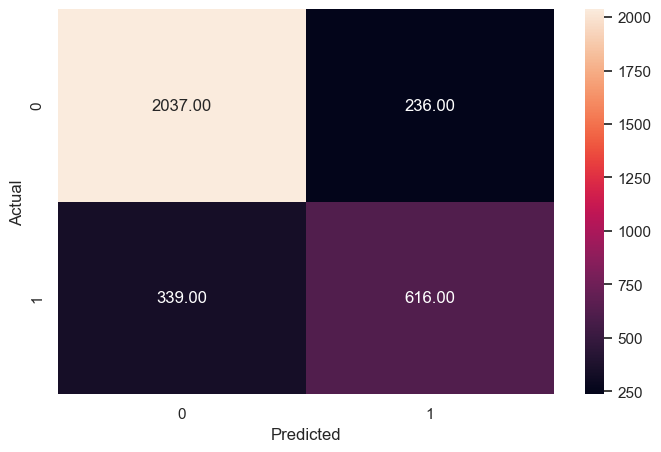

In [217]:
# Checking the performance on the training data
y_pred_train = lgr.predict(X_train)
metrics_score(y_train, y_pred_train)

The model achieves an accuracy of 82% on the training data, with higher precision, recall, and F1-scores for class 0 (not a lead) compared to class 1 (lead).

***Let's check the performance on the test set***

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       962
           1       0.71      0.60      0.65       422

    accuracy                           0.80      1384
   macro avg       0.77      0.75      0.76      1384
weighted avg       0.80      0.80      0.80      1384



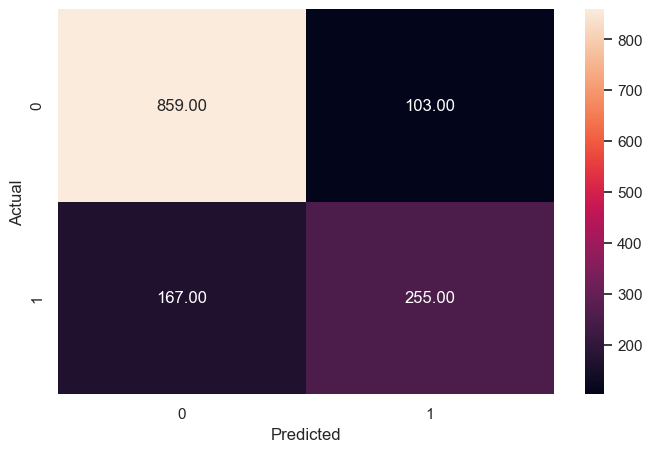

In [218]:
# Checking the performance on the test dataset
y_pred_test = lgr.predict(X_test)
metrics_score(y_test, y_pred_test)

The model performs slightly worse on the test data with an accuracy of 80%. The precision, recall, and F1-scores are lower for class 1 (lead) compared to class 0 (not a lead).

***Finding the optimal threshold for the model using the Precision-Recall Curve***

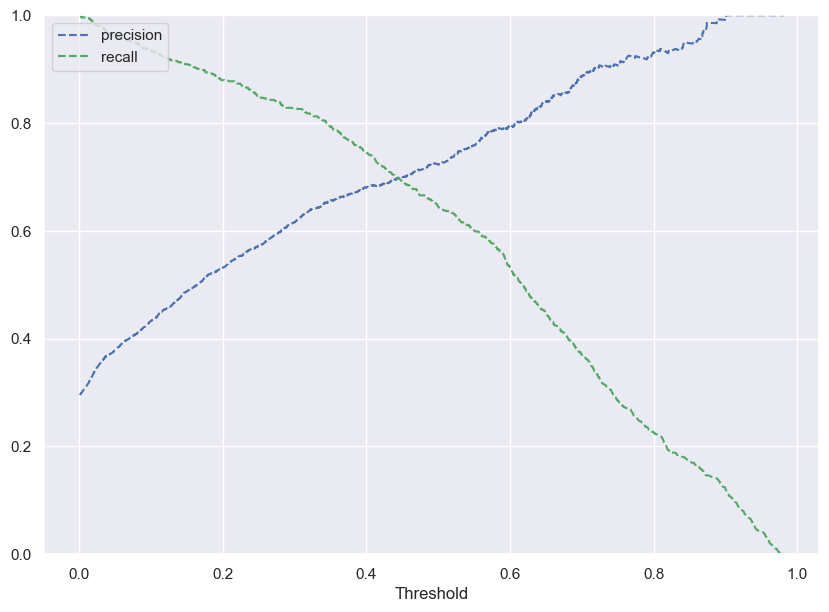

In [219]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lgr=lgr.predict_proba(X_train)

precisions_lgr, recalls_lgr, thresholds_lgr = precision_recall_curve(y_train, y_scores_lgr[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lgr, precisions_lgr[:-1], 'b--', label='precision')
plt.plot(thresholds_lgr, recalls_lgr[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [220]:
# Setting the optimal threshold
optimal_threshold = 0.45

***Checking the performance of the model on train and test data using the optimal threshold.***

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2273
           1       0.70      0.69      0.69       955

    accuracy                           0.82      3228
   macro avg       0.79      0.78      0.78      3228
weighted avg       0.82      0.82      0.82      3228



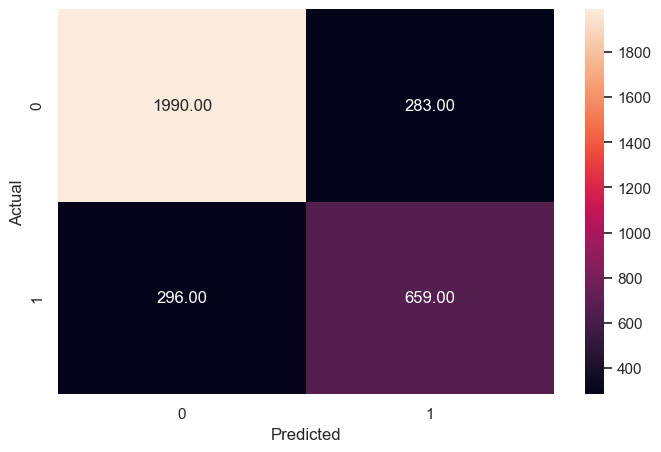

In [221]:
# creating confusion matrix
y_pred_train = lgr.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

The model performance has improved as compared to our initial model.

***Let's check the performance on the test set***

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       962
           1       0.69      0.64      0.67       422

    accuracy                           0.80      1384
   macro avg       0.77      0.76      0.76      1384
weighted avg       0.80      0.80      0.80      1384



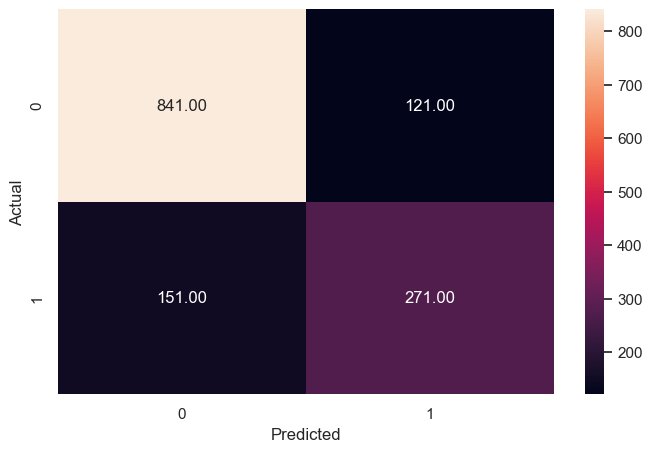

In [222]:
y_pred_test = lgr.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

The precision has dropped compared to inital model but using optimial threshold the model is able to provide the balanced performance.

***Let's scale the data for support vector machines.***

In [223]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

***Checking the performance of the model on train and test data***

In [224]:
svm = SVC(kernel='linear',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y = y_train)

***Checking the performance of the model on training and testing data***

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2273
           1       0.72      0.72      0.72       955

    accuracy                           0.83      3228
   macro avg       0.80      0.80      0.80      3228
weighted avg       0.83      0.83      0.83      3228



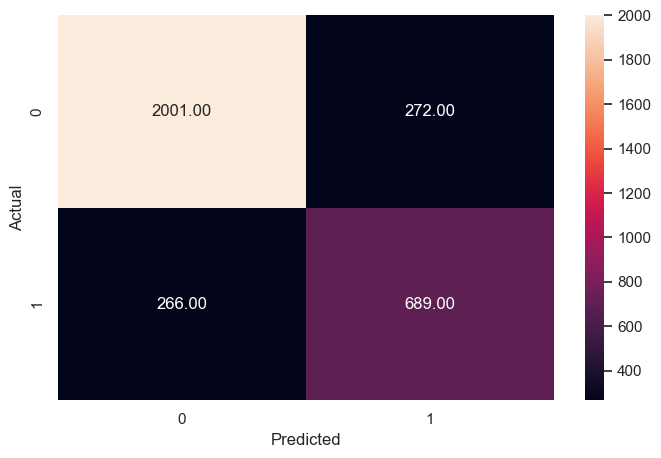

In [225]:
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

***Checking model performance on test set***

Testing performance:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       962
           1       0.69      0.67      0.68       422

    accuracy                           0.81      1384
   macro avg       0.78      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384



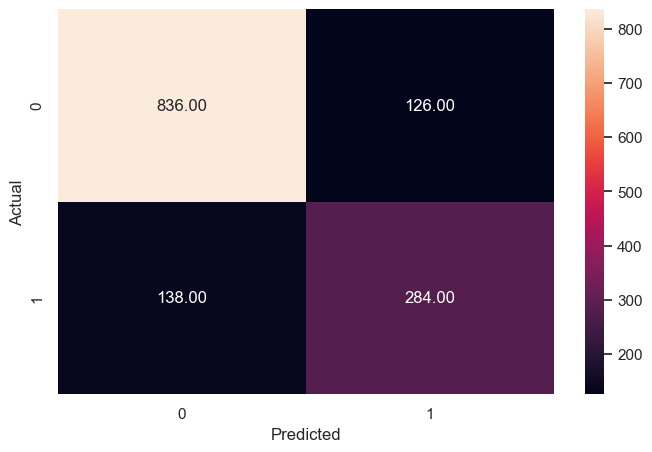

In [226]:
print("Testing performance:")
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

***Find the optimal threshold for the model using the Precision-Recall Curve***

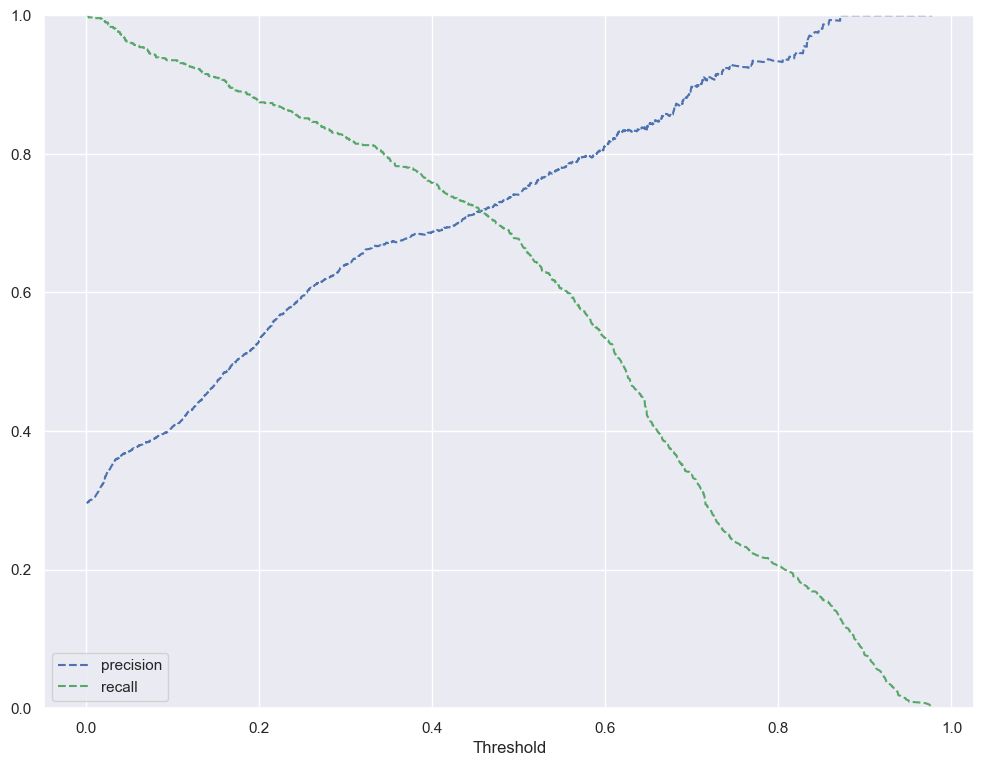

In [227]:
# Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(12,9))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')
plt.ylim([0,1])
plt.show()

At threshold ~1.0, both precision and recall drop to 0, indicating extreme thresholds are ineffective.

## Building a Decision Tree model

***Building a Decision Tree Model***

In [228]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

***Checking performance on the training dataset***

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



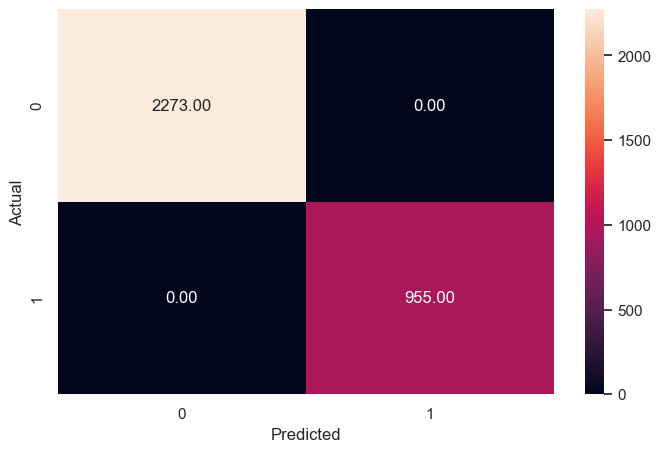

In [229]:
 # Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

- Almost 0 errors on the training set, each sample has been classified correctly.
- Model has performed very well on the training set.
- As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.

***Checking model performance on test set***

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



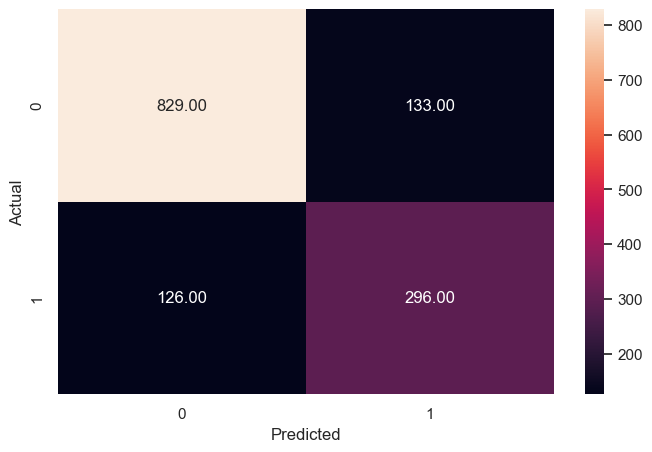

In [230]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

The decision tree model is clearly overfitting. However the decision tree has better performance compared to Logistic Regression and SVM models.

## Do we need to prune the tree?

***Perform hyperparameter tuning for the decision tree model using GridSearch CV***

In [231]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=75, min_samples_split=10,
                       random_state=1)

***Checking performance on the training set***

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2273
           1       0.86      0.81      0.83       955

    accuracy                           0.90      3228
   macro avg       0.89      0.88      0.88      3228
weighted avg       0.90      0.90      0.90      3228



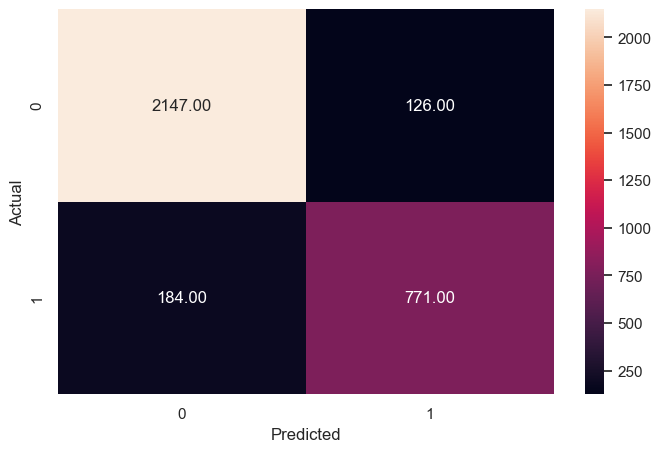

In [232]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       962
           1       0.78      0.72      0.75       422

    accuracy                           0.85      1384
   macro avg       0.83      0.82      0.82      1384
weighted avg       0.85      0.85      0.85      1384



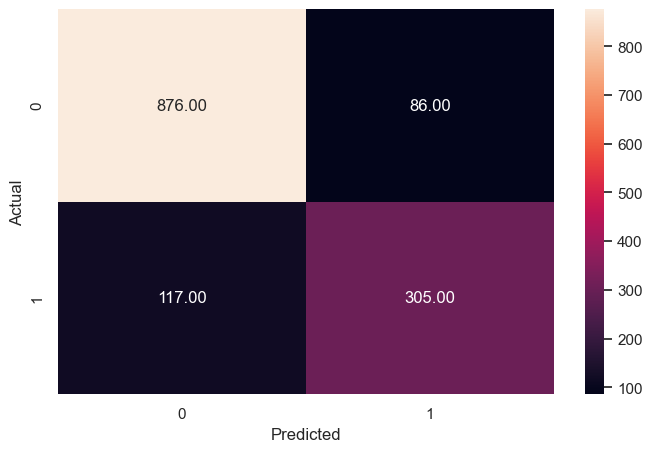

In [233]:
# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

***Visualizing the Decision Tree***

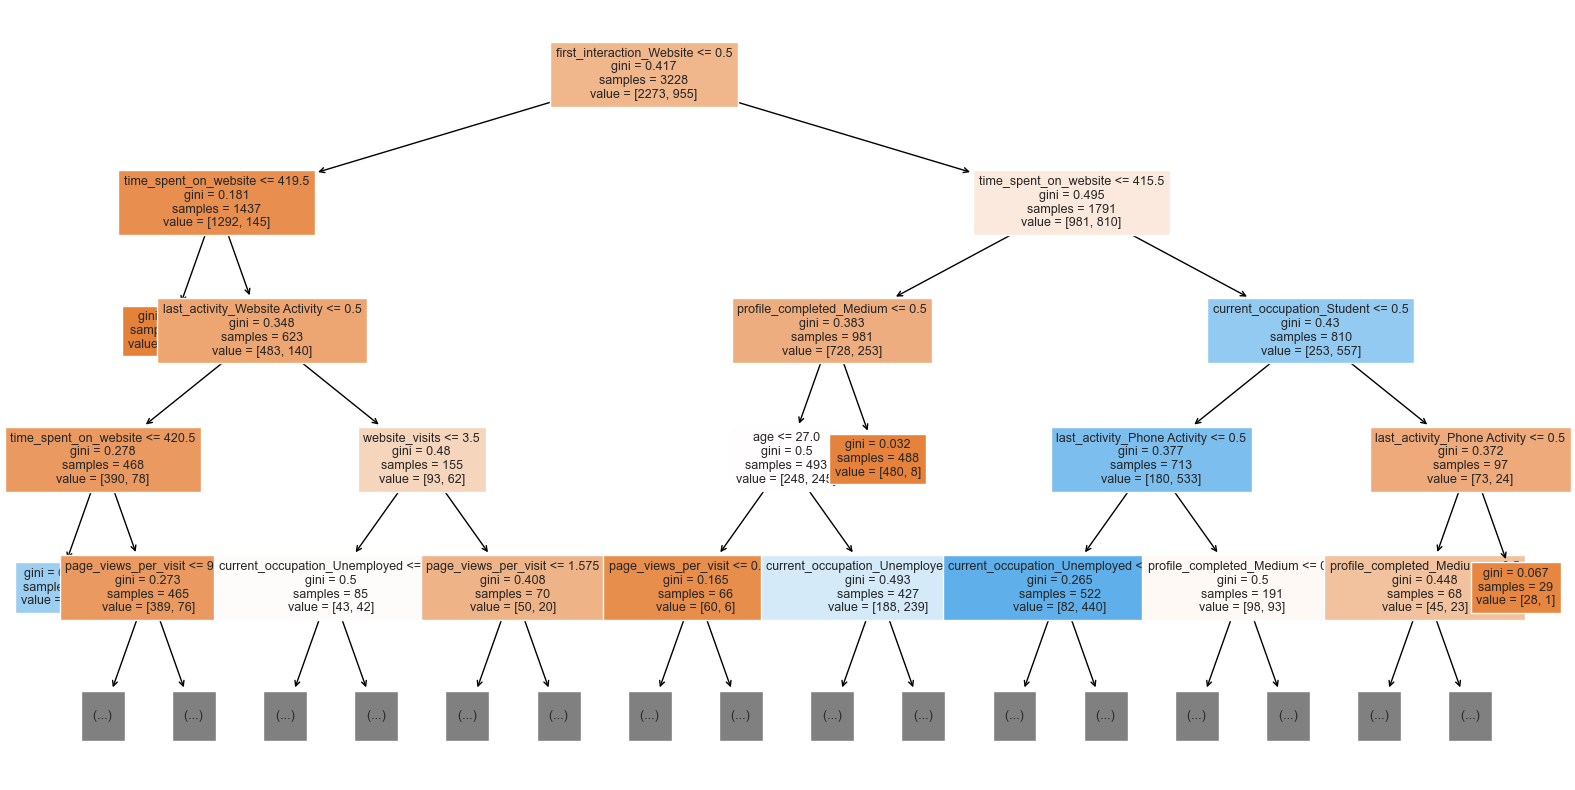

In [234]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### **Random Forest Classifier**

### Building Random Forest Model

In [235]:
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

***Check the performance of the model on the train and test data***

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



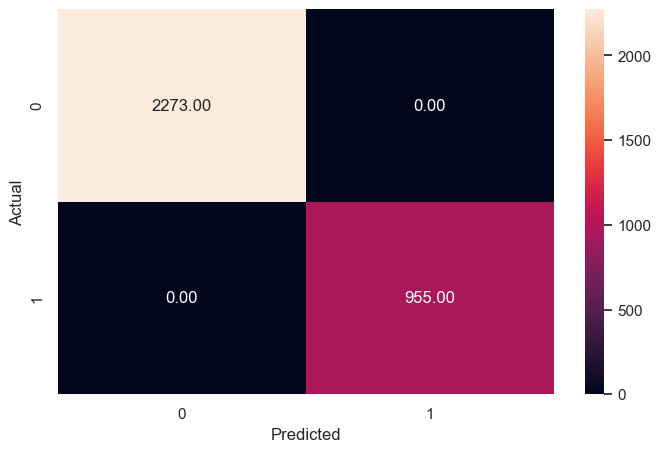

In [236]:
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

In [ ]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

## Actionable Insights and Recommendations

***Insights***
- Unemployed and professional users are mostly middle-aged, while students are younger.
- Most users show moderate engagement with the website
- We note that students and unemployed individuals show higher page views per visit.
- We also note that digital media is more frequently used compared to print media and print media is not commonly used

***Recommendations***
- To increase leads they should create age-specific campaigns for middle-aged and younger users.
- They should also Investigate highly engaged users to replicate their positive behaviors across a broader audience.
- They should Personalize content to boost engagement among less active users.